## Introduction

Amidst growing financial insecurity during the pandemic, unsecured debt has continued to rise (Frech et al., 2021). Consequently, the consumer credit market and risk prediction has been a matter of great speculation and fear, lest there be a repeat of the financial crises that rocked the economic world in the late 2000s: In 2006, Taiwan was rocked by a credit card debt crisis with debt from credit cards and cash cards reaching $268 billion USD and over half a million people unable to repay their loans (Yeh & Lien, 2009). As many could barely afford to pay the minimum credit card debt balance every month or continued to default on their payments, significant societal problems consequently plagued the country, many banks incurred heavy losses and the government eventually needed to step in to stabilize the financial system (Yeh & Lien, 2009). This situation arose because many banks in Taiwan had lowered the requirements for credit card approval in order to gain more customers within the increasingly competitive industry (Tsai, 2010). Such examples indicate that a strict assessment of an applicant’s capability to make their card payment is critical to a well-developed financial system and a business’s survivability in the banking industry. 

This project focuses on the case of customers default payments in Taiwan and finds the predictive accuracy of the probability of the customers to default. The purpose of this study is to assess the true probability of default because the real probability of default is unknown.

This project used the data from UCI Machine learning repository. As the response variable, this project used data from a binary variable, default payment (Yes = 1, No = 0). The following 23 factors were considered as explanatory variables in this study, which was based on a review of the literature:

* Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* Gender (1 = male; 2 = female).
* Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* Marital status (1 = married; 2 = single; 3 = others).
* Age (year).
* History of past payment. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months . . . 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* Amount of bill statement (NT dollar). 
* Amount of previous payment (NT dollar).

The objective of this project is to maintain ease of interpretation for the average reader. In line with this goal, we will simplify the models and methods of analysis we choose to use as well as exclude some features in the data set in favor of greater readability.



In [18]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
import random

In [8]:
df = pd.read_csv("data/default_of_credit_card_clients.csv", skiprows=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:


random.seed()

# rename column to get rid of spaces 

df.rename(columns = {"default payment next month":"default_payment"}, inplace = True)


# split into test and training set 

train_df, test_df = train_test_split(df, test_size=0.2)

X_train, y_train = (train_df.drop(columns=["default_payment"]),
                   train_df["default_payment"])

X_test, y_test = (test_df.drop(columns=["default_payment"]),
                  test_df["default_payment"])


## Exploratory Data Analysis

### Exploring Credit Card Limit Balance

First, we will look at the feature limit balance. Credit card limits are likely an indictor of how wealthy someone is since banks tend to give higher limits to clients that have more money with them. Thus, this may be an important feature when predicting if someone is able to pay the bill on time. 

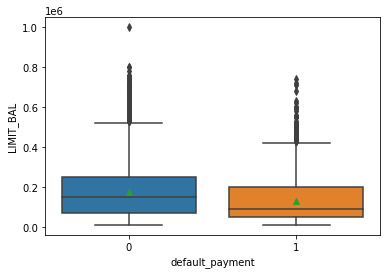

In [19]:
limit_bal = train_df.groupby("default_payment")['LIMIT_BAL'].mean()
sns.boxplot(x = "default_payment", y = "LIMIT_BAL", data = train_df, showmeans=True)
plt.show()

The side-by-side bloxplots above compare credit card limit balance of those who defaulted on their bill next month (class 1) vs those who did not default (class 0). The means are indicated by the green triangles, and the median is shown as the middle line in the box. Looking at the plot indicates that the mean and median is lower for clients who defaulted on the credit card next month. 

In [20]:
pd.DataFrame(limit_bal)

,LIMIT_BAL
default_payment,
0,177806.430937
1,131488.760894


## References

Dua, D., & Graff, C. (2016). UCI Machine Learning Repository: default of credit card clients Data Set [Data set].  University of California, Irvine, School of Information and Computer Science. https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Frech, A., Houle, J., & Tumin, D. (2021). Trajectories of unsecured debt and health at midlife. SSM - Population Health, 15, 100846. https://doi.org/10.1016/j.ssmph.2021.100846

Tsai, B.-H. (2010). Gauging bank efficiency during card insolvency crisis: the case of the Taiwanese banks. The Journal of Developing Areas, 44(1), 267–285. https://doi.org/10.1353/jda.0.0087

Yeh, I-Cheng., & Lien, C. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473–2480. https://doi.org/10.1016/j.eswa.2007.12.020